In [1]:
# imports
import numpy as np
from structure import central_thermal, integrate
from eos import mean_molecular_weight
from zams import Teff, surface_luminosity
from astro_const import Rsun, Msun, Lsun
from scipy.optimize import brentq
%matplotlib inline

# using the constants from the last project
delta_m = Msun*1e-18
eta = 1e-20
xi = 5e-2

# mass ratio of hydrogen
XH = 0.706

# z, x, and a arrays for the makeup of the star
Z = np.array([1,2,7])
A = np.array([1,4, 14])
X = np.array([XH, 0.275, 0.019])

mu = mean_molecular_weight(Z,A,X)

# defining the minimizing function
def min_this(R_guess, S_mass, delta_m, eta, xi, mu):
    
    '''
    minimizes the difference between the surface luminosity
        and the luminosity from the nuclear reactions 
        at the center of the star
        
    arguments:
        R_guess (scalar)
            guess for the final radius
        S_mass (scalar)
            mass of the given star
        delta_m (scalar)
            steps for integrating through mass
        eta (scalar)
            determines the stopping point of the iterations
        xi (scalar)
            helps determine step size
        mu (scalar)
            mean molecular weight
            
    returns:
        L_want - l[-1]
            difference in luminosities mentioned above
    '''

    Pc, rhoc, Tc = central_thermal(S_mass, R_guess, mu)

    m, r, p, l = integrate(Pc,rhoc,Tc,delta_m,eta,xi,mu)

    # calculating desired radius
    L_want = surface_luminosity(Teff(S_mass*Msun),r[-1])

    return L_want - l[-1]

# list of masses we are using
mass_list = np.array([0.1, 0.15, 0.2, 0.3])

# initializing a ton of stuff
L_list = np.zeros(len(mass_list))
Teff_list = np.zeros(len(mass_list))
rhoc_list = np.zeros(len(mass_list))
Tc_list = np.zeros(len(mass_list))
R_list = np.zeros(len(mass_list))

# iterates through all of masses and finds the wanted luminosities
for i,S_mass in enumerate(mass_list):
    
    R_final = brentq(min_this,a = 0.0001, b = 1, args = (S_mass, delta_m, eta, xi, mu))

    T_surf = Teff(S_mass)

    Teff_list[i] = T_surf

    L_list[i] = surface_luminosity(T_surf,R_final*Rsun)/Lsun

    Pc, rhoc, Tc = central_thermal(S_mass, R_final, mu)

    rhoc_list[i] = 1000*rhoc/(100**3)

    Tc_list[i] = Tc

    R_list[i] = R_final

    print(R_final)

    

C:\Users\hippo\Downloads\AST_304_Projects-main (1)\AST_304_Projects-main\project3\structure.py:141: RuntimeWarning: overflow encountered in true_divide
  H_z = z/np.abs(dzdm)
C:\Users\hippo\Downloads\AST_304_Projects-main (1)\AST_304_Projects-main\project3\structure.py:141: RuntimeWarning: divide by zero encountered in true_divide
  H_z = z/np.abs(dzdm)


0.1408764751575697
0.18916973183029875
0.23283633605277645
0.3113666213832169


Masses from left to right are: 0.1, 0.15, 0.2, 0.3, all in solar masses


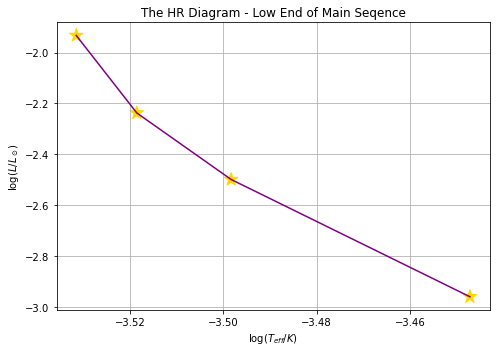

In [2]:
# plotting the HR Diagram
import matplotlib.pyplot as plt

plt.figure(figsize = (7,5))
plt.scatter(-np.log10(Teff_list), np.log10(L_list), color = 'gold',  marker = '*', s = [200,200,200,200])
plt.plot(-np.log10(Teff_list), np.log10(L_list), color = 'purple')
plt.title("The HR Diagram - Low End of Main Seqence")
plt.xlabel(r"log($T_{eff}/K$)")
plt.ylabel(r"log($L/L_\odot$)")
plt.grid()
plt.tight_layout()
print('Masses from left to right are: 0.1, 0.15, 0.2, 0.3, all in solar masses')

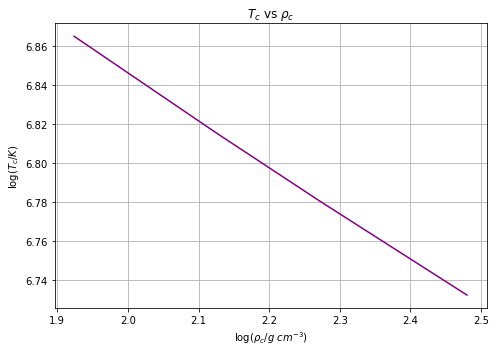

In [3]:
# plotting central temp and pressure for a 0.3 mass star
plt.figure(figsize = (7,5))
plt.plot(np.log10(rhoc_list), np.log10(Tc_list), color = 'purple')

plt.title(r"$T_c$ vs $\rho_c$")
plt.xlabel(r"log($\rho_c /g$ $cm^{-3}$)")
plt.ylabel(r"log($T_c/K$)")
plt.tight_layout()
plt.grid()

In [4]:
R_final = brentq(min_this,a = 0.01, b = 1, xtol = 1e-10,args = (.3, delta_m, eta, xi, mu))
Pc, rhoc, Tc = central_thermal(.3, R_final, mu)
m, r, p, l = integrate(Pc,rhoc,Tc,delta_m,eta,xi,mu)

C:\Users\hippo\Downloads\AST_304_Projects-main (1)\AST_304_Projects-main\project3\structure.py:141: RuntimeWarning: overflow encountered in true_divide
  H_z = z/np.abs(dzdm)
C:\Users\hippo\Downloads\AST_304_Projects-main (1)\AST_304_Projects-main\project3\structure.py:141: RuntimeWarning: divide by zero encountered in true_divide
  H_z = z/np.abs(dzdm)


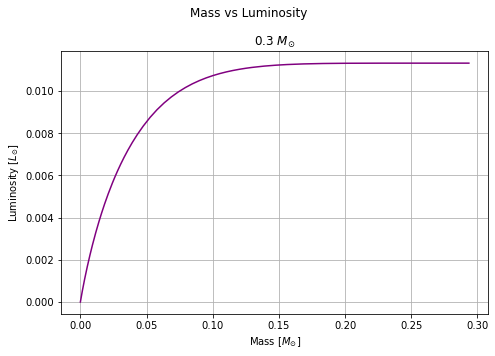

In [5]:
# plotting mass and luminosity for a 0.3 mass star
plt.figure(figsize = (7,5))
plt.plot(m/1.989e30,l/3.828e26, color = 'purple')
plt.title('0.3 $M_{\odot}$')
plt.suptitle('Mass vs Luminosity')
plt.xlabel('Mass [$M_{\odot}$]')
plt.ylabel('Luminosity [$L_{\odot}$]')
plt.tight_layout()
plt.grid()

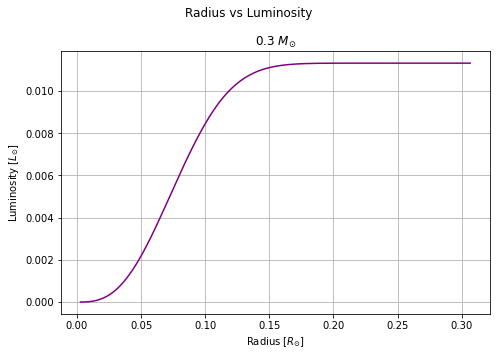

In [6]:
# plotting radius and luminosity for a 0.3 mass star
plt.figure(figsize = (7,5))
plt.plot(r/6.957e8,l/3.828e26, color = 'purple')
plt.suptitle('Radius vs Luminosity')
plt.title('0.3 $M_{\odot}$')
plt.xlabel('Radius [$R_{\odot}$]')
plt.ylabel('Luminosity [$L_{\odot}$]')
plt.tight_layout()
plt.grid()

In [7]:
# finding the radius when the luminosity is at 90%
ninety_rad = r[np.max(np.where(l <= np.max(l)*0.9))]

print('90% radius:', round(ninety_rad/6.957e8,5), 'solar radii')
print('90% radius:', round(ninety_rad,2), 'meters')

print('\ncheck to match instructions: ', round(ninety_rad/r[-1],4))

90% radius: 0.12124 solar radii
90% radius: 84348145.29 meters

check to match instructions:  0.3954


In [8]:
# finding the mass when the luminosity is at 90%
ninety_mass = m[np.max(np.where(l <= np.max(l)*0.9))]

print('90% radius:', round(ninety_mass/(.3*Msun),5), 'solar masses')
print('90% radius:', round(ninety_mass, -3), 'kg')

print('\ncheck to match instructions: ', round(ninety_mass/m[-1],4))

90% radius: 0.2644 solar masses
90% radius: 1.5772079912820235e+29 kg

check to match instructions:  0.2702


In [9]:
T = Tc*(p/Pc)**(1-1/(5/3))

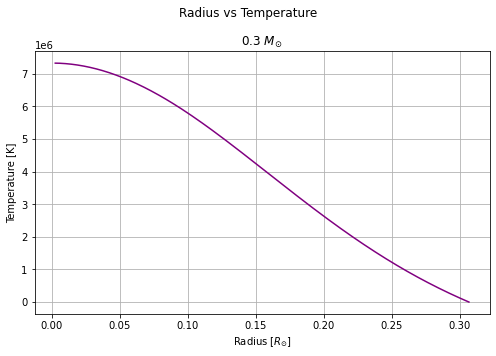

In [10]:
# plotting radius and temperature for a 0.3 mass star
plt.figure(figsize = (7,5))
plt.plot(r/6.957e8,T, color = 'purple')
plt.xlabel('Radius [$R_{\odot}$]')
plt.ylabel('Temperature [K]')
plt.suptitle('Radius vs Temperature')
plt.title('0.3 $M_{\odot}$')
plt.tight_layout()
plt.grid()

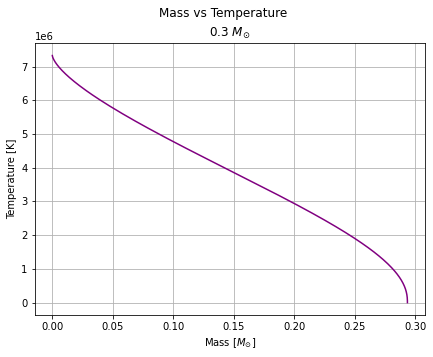

In [11]:
# plotting mass and temperature for a 0.3 mass star
plt.figure(figsize = (7,5))
plt.plot(m/1.989e30,T, color = 'purple')
plt.xlabel('Mass [$M_{\odot}$]')
plt.ylabel('Temperature [K]')
plt.suptitle('Mass vs Temperature')
plt.title('0.3 $M_{\odot}$')
plt.tight_layout()
plt.grid()